In this notebook, I quickly explore the competition images

In [53]:
import glob
from tqdm import tqdm
import pandas as pd
import cv2
import matplotlib.pylab as plt
import ntpath
import os
%matplotlib inline

In [31]:
IMAGES_PATH = 'data/**/images/*.png'
MASKS_PATH = 'data/**/masks/*.png'

# Data exploration

In [94]:
def plot_one_image(img_path):
    """Plot one image with its corrsponding masks.
    """
    mask_folder = img_path
    masks_folder = os.path.abspath(os.path.join(img_path, os.pardir)).replace('images', 'masks')
    masks_paths = glob.glob(os.path.join(masks_folder, '*.png'))
    print(len(masks_paths))
    img_name = ntpath.basename(ntpath.splitext(img_path)[0])
    total = len(masks_paths) + 1 
    fig, axes = plt.subplots((total // 2) + 1, 2, figsize=(12, 12))
    axes = axes.ravel()
    for i, mask_path in enumerate(masks_paths):
        mask = cv2.imread(mask_path)
        axes[i].imshow(mask)
    img = cv2.imread(img_path)
    axes[len(masks_paths)].imshow(img)
    fig.suptitle(img_name)

For one image, there are multiple masks.

100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


19


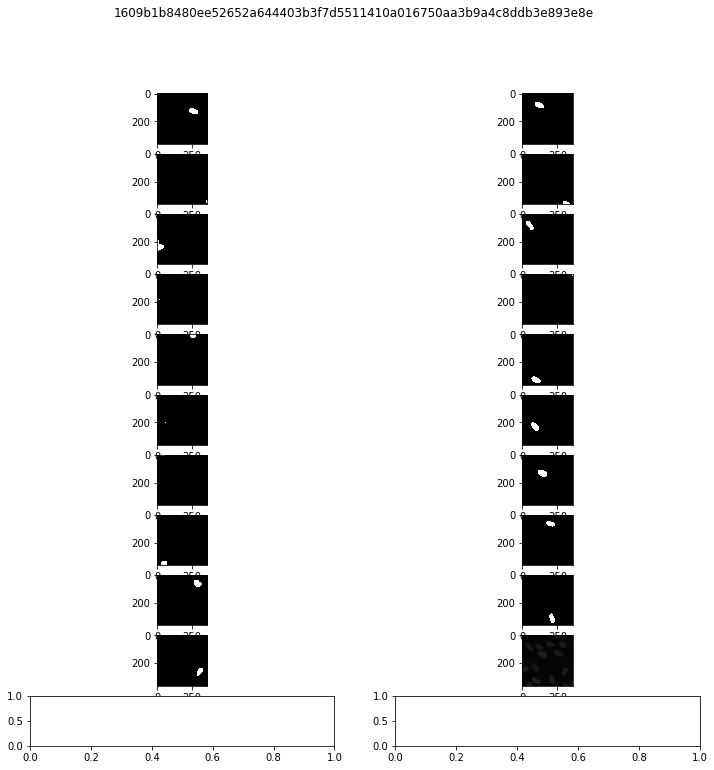

In [95]:
for fp in tqdm(glob.glob(IMAGES_PATH)[10:11]):
    plot_one_image(fp)